
## Attribute Information:
    -- 1. #3  (age)       
    -- 2. #4  (sex)       
    -- 3. #9  (cp)        
    -- 4. #10 (trestbps)  
    -- 5. #12 (chol)      
    -- 6. #16 (fbs)       
    -- 7. #19 (restecg)   
    -- 8. #32 (thalach)   
    -- 9. #38 (exang)     
    -- 10. #40 (oldpeak)   
    -- 11. #41 (slope)     
    -- 12. #44 (ca)        
    -- 13. #51 (thal)      
    -- 14. #58 (num)       (the predicted attribute)

    3 age: age in years
    4 sex: sex (1 = male; 0 = female)
    9 cp: chest pain type
      -- Value 1: typical angina
      -- Value 2: atypical angina
      -- Value 3: non-anginal pain
      -- Value 4: asymptomatic
    10 trestbps: resting blood pressure (in mm Hg on admission to the 
      hospital)
    12 chol: serum cholestoral in mg/dl
    16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
    19 restecg: resting electrocardiographic results
      -- Value 0: normal
      -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                  elevation or depression of > 0.05 mV)
      -- Value 2: showing probable or definite left ventricular hypertrophy
                  by Estes' criteria
    32 thalach: maximum heart rate achieved
    38 exang: exercise induced angina (1 = yes; 0 = no)
    40 oldpeak = ST depression induced by exercise relative to rest
    41 slope: the slope of the peak exercise ST segment
      -- Value 1: upsloping
      -- Value 2: flat
      -- Value 3: downsloping
    44 ca: number of major vessels (0-3) colored by flourosopy
    51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    58 num: diagnosis of heart disease (angiographic disease status)
      -- Value 0: < 50% diameter narrowing
      -- Value 1: > 50% diameter narrowing
      (in any major vessel: attributes 59 through 68 are vessels)
     

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC as svc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [48]:
cols = ['age',
        'sex',
        'chest_pain_type',
        'resting_bp',
        'cholesterol',
        'fasting_blood_sugar',
        'resting_ecg',
        'max_heartrate',
        'exercise_induced_angina',
        'ST_depression',
        'slope_exercise',
        'num_major_vessels',
        'thal',
        'target'
    ]

url = 'https://raw.githubusercontent.com/jd-pham/heart_disease.csv/main/heart_cleveland_upload.csv'

df = pd.read_csv(url) # downloads and reads .csv file into a dataframe

df.columns = cols # rename columns so its easier to interpret
df


age  sex  chest_pain_type  resting_bp  cholesterol  fasting_blood_sugar  \
0     69    1                0         160          234                    1   
1     69    0                0         140          239                    0   
2     66    0                0         150          226                    0   
3     65    1                0         138          282                    1   
4     64    1                0         110          211                    0   
..   ...  ...              ...         ...          ...                  ...   
292   40    1                3         152          223                    0   
293   39    1                3         118          219                    0   
294   35    1                3         120          198                    0   
295   35    0                3         138          183                    0   
296   35    1                3         126          282                    0   

     resting_ecg  max_heartrate  exercise_induced_angina  ST_depression  \
0              2            131                        0            0.1   
1              0            151                        0            1.8   
2              0            114                        0            2.6   
3              2            174                        0            1.4   
4              2            144                        1            1.8   
..           ...            ...                      ...            ...   
292            0            181                        0            0.0   
293            0            140                        0            1.2   
294            0            130                        1            1.6   
295            0            182                        0            1.4   
296            2            156                        1            0.0   

     slope_exercise  num_major_vessels  thal  target  
0                 1                  1     0       0  
1                 0                  2     0       0  
2                 2                  0     0       0  
3                 1                  1     0       1  
4                 1                  0     0       0  
..              ...                ...   ...     ...  
292               0                  0     2       1  
293               1                  0     2       1  
294               1                  0     2       1  
295               0                  0     0       0  
296               0                  0     2       1  

[297 rows x 14 columns]

In [37]:
dataset = df.loc[:,:'thal'] # setup our input X as "dataset" by excluding the last column, target
try:
    target = df['target'] # sets up our output Y
except KeyError:
    target = df['condition']
print(dataset.shape) 
print(target.shape) # 297 x 1 dimension

(297, 13)
(297,)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(dataset,          # X
                                                    target,           # Y
                                                    test_size=0.3,    # splits 30% of data as a testing set
                                                    random_state=100  # sets seed of split for consistent accuracy measuring when changing variables
                                                    )
# Testing set is used to measure how well our classifier does against data it hasn't seen.

print('training shapes: X=',x_train.shape, 'Y=',y_train.shape)
print('testing shapes: X=',x_test.shape, 'Y=',y_test.shape)

training shapes: X= (207, 13) Y= (207,)
testing shapes: X= (90, 13) Y= (90,)


In [39]:
classifier = svc(kernel='linear') # a lot of variables are assigned by default, linear kernel has performed the best
classifier.fit(x_train, y_train) # send training dataset to our SVM classifier to learn how to predict heart disease

predictions = classifier.predict(x_test) # allow our classifier to predict against testing data
print(classifier.score(x_test, y_test)) # shows accuracy
print(np.mean(predictions==y_test)) # same as above, basically compare y_pred to y_test, when y_pred[i] == y_test[i]: return 1, else 0. If all are correct, we get a mean of 1.


0.8222222222222222
0.8222222222222222


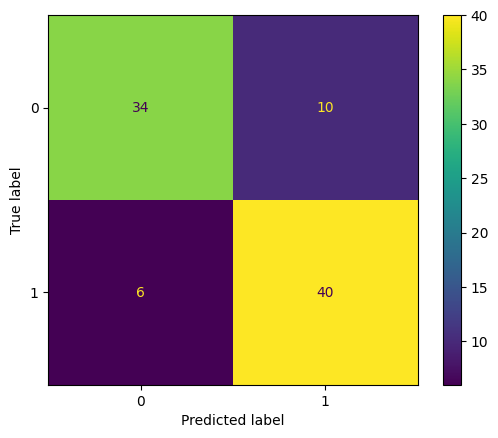

In [40]:
conf_matrix = confusion_matrix(y_test, predictions, labels=classifier.classes_)
ConfusionMatrixDisplay.from_predictions(predictions, y_test)

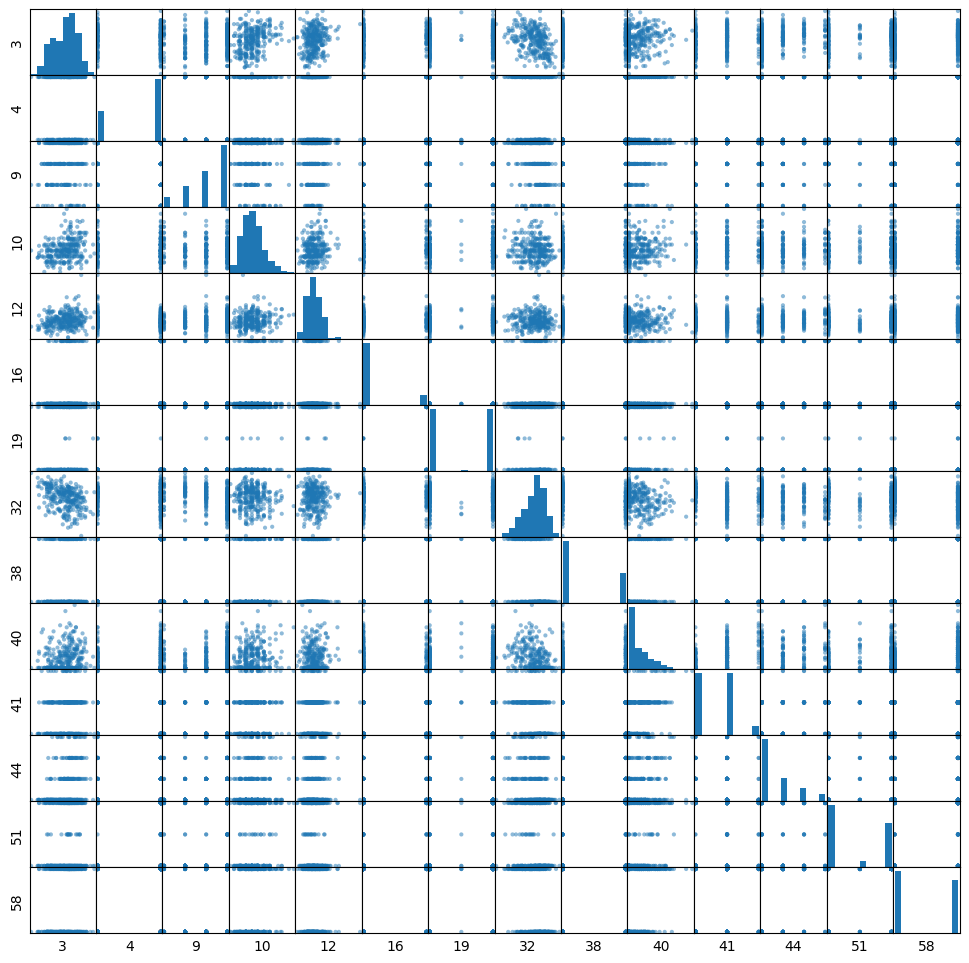

In [34]:
edited_col = [3, 4, 9, 10, 12, 16, 19, 32, 38, 40, 41, 44, 51, 58]
edited_df = df.__deepcopy__()
edited_df.columns = edited_col
scatter = pd.plotting.scatter_matrix(edited_df, figsize=(12,12))
for subaxis in scatter:
        for ax in subaxis:
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])

## No Heart Disease Statistics

In [41]:
no_disease = df[df['target'] == 0]
no_disease.drop('target', axis=1, inplace=True)
no_disease_means = np.mean(no_disease)
no_disease_means

<ipython-input-41-e20fbb6c248a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_disease.drop('target', axis=1, inplace=True)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


age                         52.64375
sex                          0.55625
chest_pain_type              1.79375
resting_bp                 129.17500
cholesterol                243.49375
fasting_blood_sugar          0.14375
resting_ecg                  0.84375
max_heartrate              158.58125
exercise_induced_angina      0.14375
ST_depression                0.59875
slope_exercise               0.41250
num_major_vessels            0.27500
thal                         0.37500
dtype: float64

In [42]:
no_disease_median = pd.Series(np.median(no_disease, axis=0))
no_disease_median

0      52.0
1       1.0
2       2.0
3     130.0
4     235.5
5       0.0
6       0.0
7     161.0
8       0.0
9       0.2
10      0.0
11      0.0
12      0.0
dtype: float64

In [43]:
no_disease_STD  = np.std(no_disease)
no_disease_STD

age                         9.521257
sex                         0.496826
chest_pain_type             0.922611
resting_bp                 16.322741
cholesterol                53.589294
fasting_blood_sugar         0.350836
resting_ecg                 0.984549
max_heartrate              18.983701
exercise_induced_angina     0.350836
ST_depression               0.784696
slope_exercise              0.595688
num_major_vessels           0.631961
thal                        0.756224
dtype: float64

## Has Heart Disease Statistics

In [44]:
has_disease = df[df['target'] == 1]
has_disease.drop('target', axis=1, inplace=True)
disease_means = np.mean(has_disease)
disease_means

<ipython-input-44-15fd1f7eb8b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_disease.drop('target', axis=1, inplace=True)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


age                         56.759124
sex                          0.817518
chest_pain_type              2.583942
resting_bp                 134.635036
cholesterol                251.854015
fasting_blood_sugar          0.145985
resting_ecg                  1.175182
max_heartrate              139.109489
exercise_induced_angina      0.540146
ST_depression                1.589051
slope_exercise               0.824818
num_major_vessels            1.145985
thal                         1.372263
dtype: float64

In [45]:
disease_median = pd.Series(np.median(has_disease, axis=0))
disease_median

0      58.0
1       1.0
2       3.0
3     130.0
4     253.0
5       0.0
6       2.0
7     142.0
8       1.0
9       1.4
10      1.0
11      1.0
12      2.0
dtype: float64

In [46]:
disease_STD  = np.std(has_disease)
disease_STD

age                         7.870786
sex                         0.386241
chest_pain_type             0.825173
resting_bp                 18.827638
cholesterol                49.498292
fasting_blood_sugar         0.353092
resting_ecg                 0.973352
max_heartrate              22.627636
exercise_induced_angina     0.498386
ST_depression               1.300235
slope_exercise              0.565399
num_major_vessels           1.014782
thal                        0.879676
dtype: float64

Heart disease chart

<Axes: >

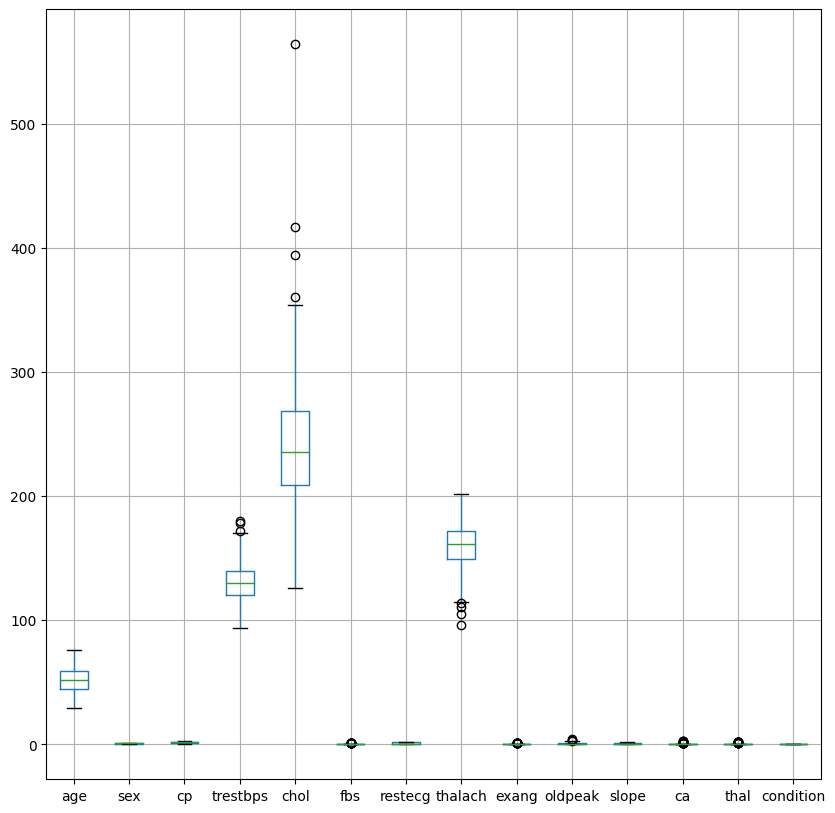

In [49]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']
df[df['condition'] == 0].boxplot(figsize=(10,10))


<Axes: >

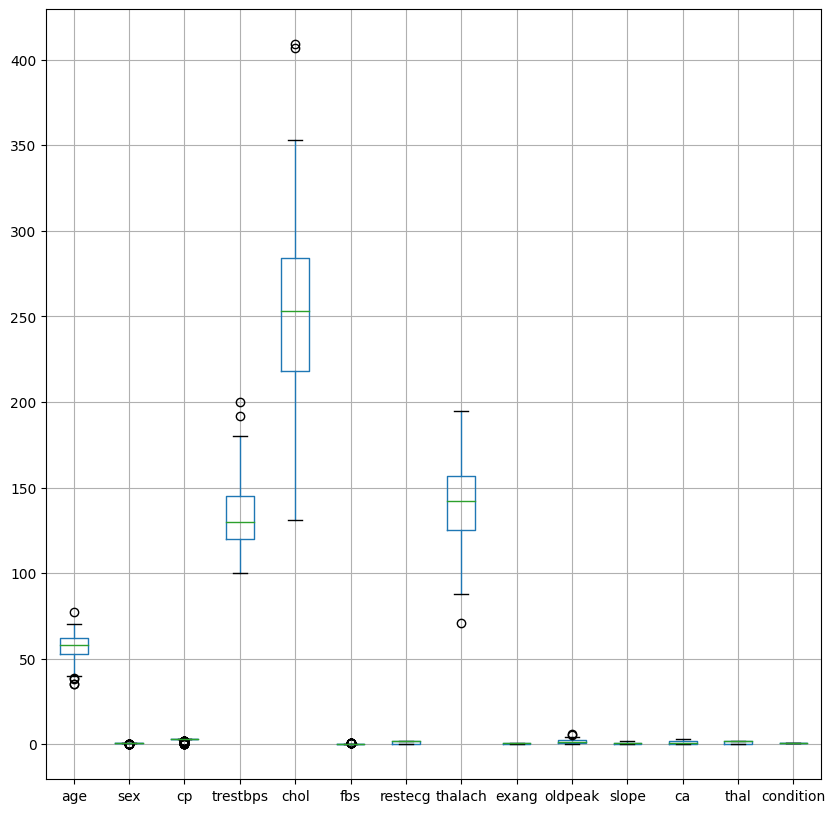

In [50]:
df[df['condition'] == 1].boxplot(figsize=(10,10))

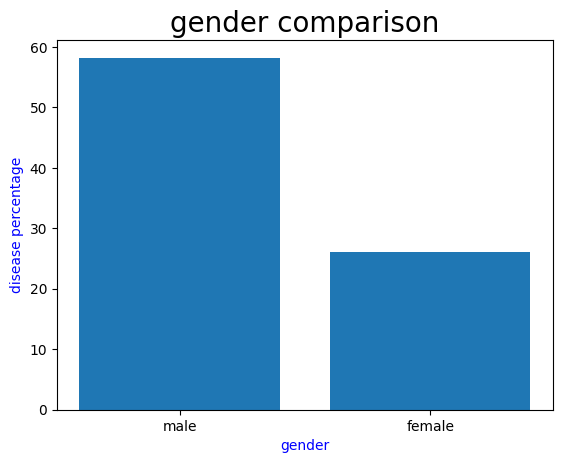

In [15]:
x= np.array(["male", "female"])
y= np.array([58.2,26.0]) 
f1= {'color':'blue',}
f2= {'color':'blue',}
ft= {'color':'black', 'size': 20}
plt.title("gender comparison", fontdict=ft, loc= 'center')
plt.xlabel("gender", fontdict=f1)
plt.ylabel("disease percentage", fontdict=f2)
plt.bar(x,y)
plt.show()



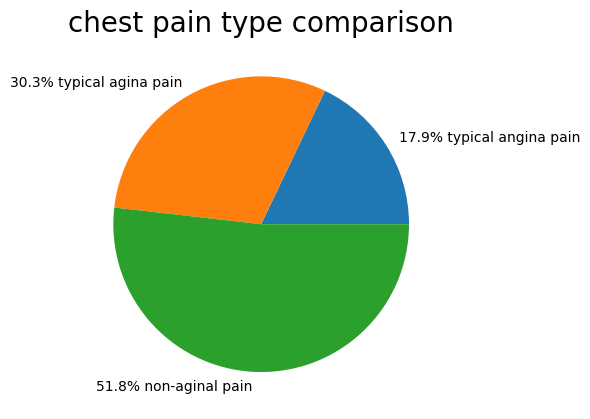

In [ ]:
# 142 out of the 274 people who experience chest pain were non-aginal pain
    # 83 of the 274 had atypical agina pain
    # 49 of the 274 had typical agina
    # from the data given, most of the patience were experiencing non-aginal pain with atypical pain being in second
x= np.array([17.9,30.3,51.8])
mylabels= ["17.9% typical angina pain","30.3% typical agina pain","51.8% non-aginal pain"]

ft= {'color':'black', 'size': 20}
plt.title("chest pain type comparison", fontdict=ft, loc= 'center')
plt.pie(x,labels=mylabels)
plt.show()

46.13% of patients have Heart Disease.
53.87% of patients don't have Heart Disease.



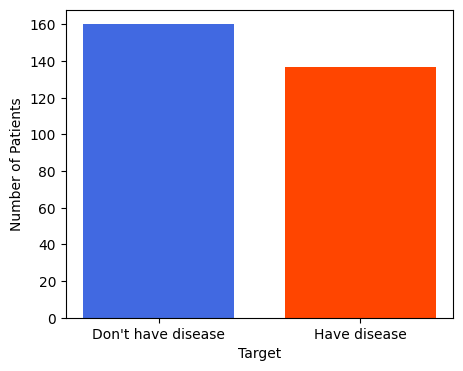

In [ ]:
df.target.value_counts()
haveDisease = len(df[df.target == 1])
dontHaveDisease = len(df[df.target == 0])

print("{:.2f}% of patients have Heart Disease.".format((haveDisease / (len(df.target)) * 100)))
print("{:.2f}% of patients don't have Heart Disease.".format((dontHaveDisease / (len(df.target)) * 100)))
print()

label = ["Don't have disease", "Have disease"]
value = (dontHaveDisease, haveDisease)

plt.subplots(figsize=(5, 4))
plt.bar(label, value, width=0.75, color=['royalblue', 'orangered'])
plt.ylabel("Number of Patients")
plt.xlabel("Target")
plt.show()

The above graph shows the amount of people from the total population who have heart diseases vs those who do not, which gives us a good reference of what our sample holds, and that our data is not skewed, and instead shows that it could be extrapolated scaled for a larger population.

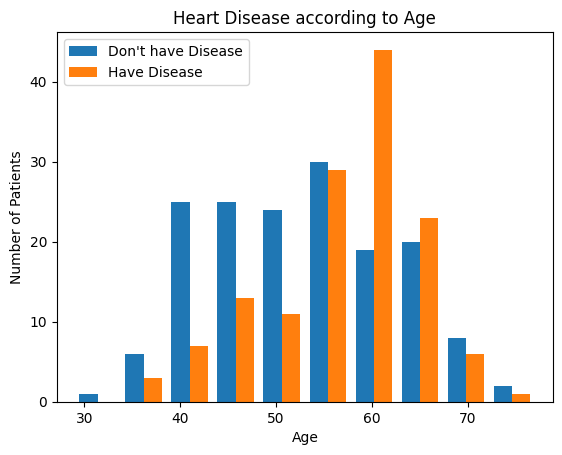

In [28]:
# pd.crosstab(df['age'], df['condition']).plot(kind="histogram", figsize=(15, 4), color=['royalblue', 'orangered'])

plt.hist([df['age'][df['condition'] == 0], df['age'][df['condition'] == 1]])
plt.title('Heart Disease according to Age')
plt.ylabel('Number of Patients')
plt.xlabel('Age')
plt.legend(["Don't have Disease", "Have Disease"])
plt.show()

The bar chart shows the age vs the number of patients, and shows the amount of people who have the disease versus those who do not, this shows that a substantial amount of people ages (54-67) are the most likely group to have heart disease. 

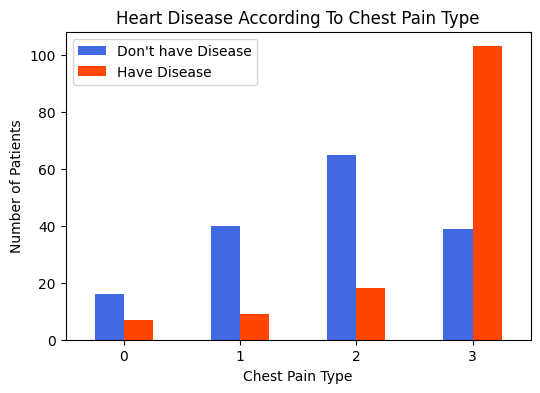

In [ ]:
pd.crosstab(df.chest_pain_type, df.target).plot(kind="bar", figsize=(6, 4), color=['royalblue', 'orangered'])
plt.title('Heart Disease According To Chest Pain Type')
plt.ylabel('Number of Patients')
plt.xlabel('Chest Pain Type')
plt.legend(["Don't have Disease", "Have Disease"])
plt.xticks(rotation=0)
plt.show()

This is a simple bar chart showing the different chest pain types and 

*   List item
*   List item

which chest pain type is more likely to act as a precursor for heart disease. 0 is typical angina, 1 is atypical angina, 2 is 

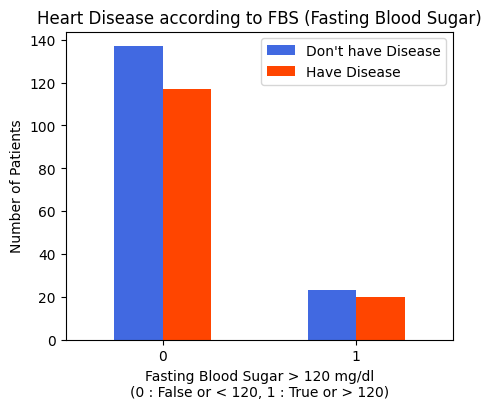

In [ ]:
pd.crosstab(df.fasting_blood_sugar, df.target).plot(kind="bar", figsize=(5, 4), color=['royalblue', 'orangered'])
plt.title('Heart Disease according to FBS (Fasting Blood Sugar)')
plt.ylabel('Number of Patients')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl\n(0 : False or < 120, 1 : True or > 120)')
plt.legend(["Don't have Disease", "Have Disease"])
plt.xticks(rotation=0)
plt.show()

This graph shows the patients' blood sugar levels, and since the graphs aren't wildly different in height, we can assume that the blood sugar levels do not affect the diagnosis of heart disease.